# Permutation Importance of M011

In [17]:
import eli5
from eli5.sklearn import PermutationImportance
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

In [4]:
train_df = pd.read_csv('../data/FE004-train.csv')
test_df = pd.read_csv('../data/FE004-test.csv')

In [60]:
train_df['atom_0'] = train_df['atom_0'].astype('category')
train_df['atom_1'] = train_df['atom_1'].astype('category')
test_df['atom_0'] = test_df['atom_0'].astype('category')
test_df['atom_1'] = test_df['atom_1'].astype('category')

In [5]:
FEATURES = ['atom_index_0', 'atom_index_1',
            'type',
            'C', 'F', 'H', 'N', 'O',
            'bonds', 'dist',
            'abs_dist',
            'dist_to_type_mean', 'dist_to_type_std',
            'molecule_couples', 'molecule_dist_mean', 'molecule_dist_min',
            'molecule_dist_max',
            'atom_0_couples_count', 'atom_1_couples_count',
            'molecule_atom_index_0_dist_mean_diff',
            'molecule_atom_index_0_dist_mean_div',
            'molecule_atom_index_0_dist_max',
            'molecule_atom_index_0_dist_max_diff',
            'molecule_atom_index_0_dist_max_div',
            'molecule_atom_index_0_dist_min',
            'molecule_atom_index_0_dist_min_diff',
            'molecule_atom_index_0_dist_min_div',
            'molecule_atom_index_0_dist_std',
            'molecule_atom_index_0_dist_std_diff',
            'molecule_atom_index_0_dist_std_div',
            'molecule_atom_index_1_dist_mean',
            'molecule_atom_index_1_dist_mean_diff',
            'molecule_atom_index_1_dist_mean_div',
            'molecule_atom_index_1_dist_max',
            'molecule_atom_index_1_dist_max_diff',
            'molecule_atom_index_1_dist_max_div',
            'molecule_atom_index_1_dist_min',
            'molecule_atom_index_1_dist_min_diff',
            'molecule_atom_index_1_dist_min_div',
            'molecule_atom_index_1_dist_std',
            'molecule_atom_index_1_dist_std_diff',
            'molecule_atom_index_1_dist_std_div',
            'molecule_atom_1_dist_mean',
            'molecule_atom_1_dist_min',
            'molecule_atom_1_dist_min_diff',
            'molecule_atom_1_dist_min_div',
            'molecule_atom_1_dist_std',
            'molecule_atom_1_dist_std_diff',
            'molecule_bonds_dist_std',
            'molecule_bonds_dist_std_diff',
            'molecule_type_dist_mean',
            'molecule_type_dist_mean_diff',
            'molecule_type_dist_mean_div',
            'molecule_type_dist_max',
            'molecule_type_dist_min',
            'molecule_type_dist_std',
            'molecule_type_dist_std_diff',
            'num_atoms',
            'flatness_metric',
            'bond_angle_plane',
            'bond_angle_axis']
TARGET = 'scalar_coupling_constant'

In [12]:
#####################
# CREATE FINAL DATASETS
#####################
X = train_df[FEATURES]
X_test = test_df[FEATURES]
y = train_df[TARGET]

In [48]:
from sklearn.metrics import mean_absolute_error

In [62]:
model.predict(X_valid)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields type

In [65]:
X_valid.drop('type', axis=1).values

array([[ 1.        ,  0.        ,  1.        , ...,  0.44376302,
        52.08433623, 34.46072338],
       [ 3.        ,  0.        ,  2.        , ...,  0.4809426 ,
        61.45857241, 21.44292595],
       [ 7.        ,  1.        ,  2.        , ...,  0.4809426 ,
         9.95257248, 21.44546914],
       ...,
       [ 9.        ,  0.        ,  8.        , ...,  0.77255928,
        55.61054558, 33.11671129],
       [12.        ,  3.        ,  8.        , ...,  0.77255928,
        33.70416287, 36.53334542],
       [16.        ,  7.        ,  8.        , ...,  0.77255928,
        69.45083563, 20.32356616]])

In [66]:
from mlxtend.evaluate import feature_importance_permutation



MODEL_NUMBER = 'M010'
run_id = '0610_1341'
n_fold = 5
RANDOM_STATE = 529
folds = KFold(n_splits=n_fold, shuffle=True, random_state=RANDOM_STATE)
for bond_type in X['type'].unique():
    fold_count = 1
    # Train the model
    X_type = X.loc[X['type'] == bond_type]
    y_type = y.iloc[X_type.index]
    X_test_type = X_test.loc[X_test['type'] == bond_type]
    oof = np.zeros(len(X_type))
    prediction_type = np.zeros(len(X_test_type))
    bond_scores = []
    for fold_n, (train_idx, valid_idx) in enumerate(folds.split(X_type)):
        print('Running Type {} - Fold {} of {}'.format(bond_type,
                                                       fold_count, folds.n_splits))
        X_train, X_valid = X_type.iloc[train_idx], X_type.iloc[valid_idx]
        y_train, y_valid = y_type.iloc[train_idx], y_type.iloc[valid_idx]
        model = lgb.Booster(model_file='../models/{}-{}-{}-{}.model'.format(MODEL_NUMBER,
                                                           run_id,
                                                           bond_type,
                                                           fold_count))
        imp_vals, _ = feature_importance_permutation(
            predict_method=model.predict, 
            X=X_valid.drop('type', axis=1).values,
            y=y_valid.values,
            metric='r2',
            num_rounds=1,
            seed=RANDOM_STATE)
        break
    break

Running Type 1JHC - Fold 1 of 5


In [80]:
perm_imp_df = pd.DataFrame(imp_vals, index=X.drop('type', axis=1).columns)

In [88]:
perm_imp_df.sort_values(0).index

Index(['molecule_atom_index_0_dist_min_div',
       'molecule_atom_index_0_dist_min_diff', 'bonds',
       'molecule_atom_index_0_dist_min', 'molecule_type_dist_min', 'F',
       'molecule_atom_index_1_dist_min_div', 'abs_dist',
       'molecule_type_dist_mean_div', 'molecule_type_dist_mean', 'O',
       'molecule_atom_1_dist_min_div', 'C', 'bond_angle_axis',
       'molecule_type_dist_std', 'molecule_atom_1_dist_min',
       'molecule_type_dist_max', 'molecule_bonds_dist_std_diff',
       'molecule_dist_min', 'molecule_atom_1_dist_std', 'num_atoms',
       'molecule_bonds_dist_std', 'bond_angle_plane',
       'molecule_atom_1_dist_min_diff', 'molecule_atom_1_dist_std_diff',
       'flatness_metric', 'N', 'molecule_type_dist_std_diff',
       'molecule_type_dist_mean_diff', 'molecule_atom_1_dist_mean',
       'molecule_atom_index_1_dist_min_diff', 'atom_index_1', 'H',
       'molecule_atom_index_0_dist_std_div', 'atom_index_0',
       'molecule_atom_index_1_dist_max_diff',
       'mole

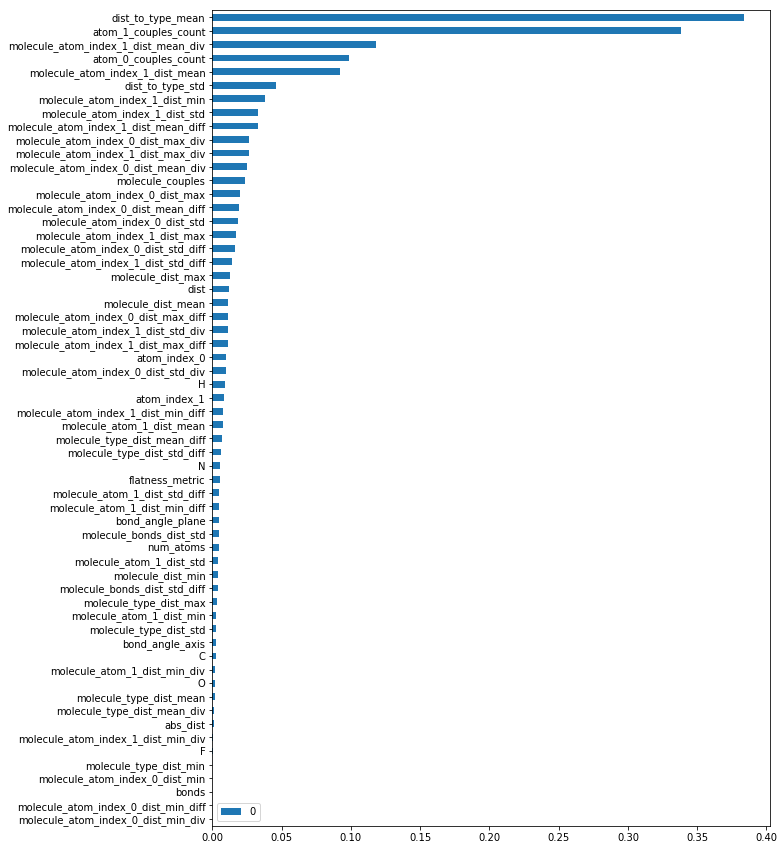

In [85]:
perm_imp_df.sort_values(0).plot(kind='barh', figsize=(10, 15))
plt.show()